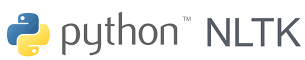

## NLP - Técnicas para el procesamiento de lenguaje natural en Python

Existen siete (7) pasos básicos que los científicos de datos emprendemos para derivar el significado del texto o de cualquier otro dato no estructurado:

**1. Segmentation** (Segmentación de oraciones)

**2. Tokenization** (Tokenización de palabras)

**3. Steeming** (Derivación del texto)| **Lemmatization** (Lematizacion de texto)

**4. Stop words** (Palabras vacias)

**5. Speech tagging** (Etiquetado del discurso)

**6. Name Entity Recognition (NER)** (Reconocimiento de entidad nombrada) | **Parsing** (Análisis de dependencias)

**7. Coreference resolution** (Resolución de correferencia)


Importamos las librerías básicas:

In [26]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') #para speech tagging
nltk.download('maxent_ne_chunker') # par NER reconocimiento de entidad nombrada
nltk.download('words') # par NER reconocimiento de entidad nombrada


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### 1. Segmentation (Segmentación de oraciones)

Esta etapa es bastante fácil. Consiste en:
* Un algoritmo de IA inteligente analiza los conjuntos de datos y define los signos de puntuación.
* Cada vez que nota un punto, da por finalizada la frase y la separa del texto completo.

En el siguiente ejemplo, deberíamos obtener tres oraciones desde este párrafo:

“Mumbai or Bombay is the capital city of the Indian state of Maharashtra.
According to the United Nations, as of 2018, Mumbai was the second most populated city in India after Delhi.
In the world with a population of roughly 20 million.”

In [5]:
Text = "Mumbai or Bombay is the capital city of the Indian state of Maharashtra. According to the United Nations, \
as of 2018, Mumbai was the second most populated city in India after Delhi. In the world with a population of roughly \
20 million."
# El parrafo es separado en oraciones
sentences = nltk.sent_tokenize(Text)

for sentence in sentences:
    print(sentence)


Mumbai or Bombay is the capital city of the Indian state of Maharashtra.
According to the United Nations, as of 2018, Mumbai was the second most populated city in India after Delhi.
In the world with a population of roughly 20 million.


### 2. Tokenization (Tokenización de palabras)

La tokenización es el primer paso en NLP. La tokenización implica tres pasos que consisten en dividir una oración compleja en palabras, comprender la importancia de cada palabra con respecto a la oración y finalmente producir una descripción estructural en una oración de entrada.

In [6]:
# texto de muestra para realizar la tokenización
text = "In Brazil they drive on the right-hand side. Brazil has a large coastline on the eastern side of South America"

# importamos word_tokenize desde nltk
from nltk.tokenize import word_tokenize

# Pasar el texto de la cadena a la palabra tokenize para romper las oraciones
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

#### Encontrar una frecuencia distinta en el texto

Podemos contabilizar cuantas veces se repite cada token (palabra) en el texto.

In [7]:
# Encontrar la frecuencia distinta en los tokens
# Importar la biblioteca FreqDist de nltk y pasar el token a FreqDist

from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'Brazil': 2, 'on': 2, 'the': 2, 'side': 2, 'In': 1, 'they': 1, 'drive': 1, 'right-hand': 1, '.': 1, 'has': 1, ...})

Nos interesa conocer las 10 palabras (tokens) que más se repiten en el texto

In [8]:
# Encontrar las 10 palabras que se repiten con mayor frecuencia

fdist1 = fdist.most_common(10)
fdist1

[('Brazil', 2),
 ('on', 2),
 ('the', 2),
 ('side', 2),
 ('In', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('.', 1),
 ('has', 1)]

### 3. Steeming  | Lemmatization

#### 3.1. Steeming (Derivación del texto)

La derivación o steeming, generalmente se refiere a normalizar las palabras en su forma básica o raíz.  Veamos la imagen siguiente:

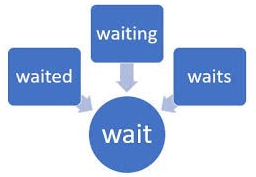

Aquí, tenemos palabras esperó, esperando y espera en ingles. Aquí la raíz de la palabra es "espera".

Existen dos métodos en Stemming:

* **Porter Stemming** (elimina las terminaciones morfológicas y flexivas comunes de las palabras)
* **Lancaster Stemming** (un algoritmo de derivación más agresivo).

**Porter Stemming**

In [9]:
# Importamos Porterstemmer desde la biblioteca nltk
# Comprobamos la palabra "esperando" y la palabra raiz que resulta "espera"

from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("waiting")

'wait'

In [10]:
# Comprobamos en la lista de palabras obtenemos la misma palabra raiz: "espera"

stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word+ ":" +pst.stem(word))

waited:wait
waiting:wait
waits:wait


**Lancaster Stemming**

In [11]:
# Importamos LancasterStemmer desde la biblioteca nltk
# Comprobamos la palabra "dando" y la palabra raiz que resulta "dar"

from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["giving", "given", "given", "gave"]
for word in stm:
 print(word + ":" + lst.stem(word))

giving:giv
given:giv
given:giv
gave:gav


#### 3.2. Lematización (Lematizacion de texto)

En términos más simples, la **Lematización** es el proceso de convertir una palabra a su forma básica.

La diferencia entre la derivación (stemming) y la lematización es que la lematización considera el contexto y convierte la palabra a su forma básica significativa, mientras que la derivación (stemming) simplemente elimina los últimos caracteres, lo que a menudo conduce a significados incorrectos y errores ortográficos.

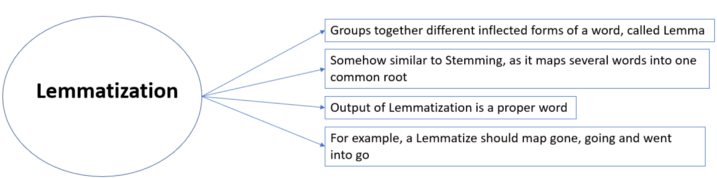

La lematización se puede implementar en Python mediante las siguientes librerias:

* Wordnet Lemmatizer
* Spacy Lemmatizer
* TextBlob
* Stanford CoreNLP

Utilizaremos la que nos proporciona NLTKL: **Wordnet Lemmatizer**.

In [14]:
# Importando la biblioteca Lemmatizer desde nltk
# Utilizamos nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


### 4. Stop Words (palabras vacías)

Las "palabras vacías" son las palabras más comunes en un idioma como "el", "a", "en", "para", "arriba", "en", "es", "todos".

Estas palabras no proporcionan ningún significado y generalmente se eliminan de los textos. Podemos eliminar estas palabras vacías usando la biblioteca nltk.

In [17]:
# importando stopwords de la biblioteca nltk

from nltk import word_tokenize
from nltk.corpus import stopwords

# debemos indicar que la oracion se encuentra en ingles
a = set(stopwords.words("english"))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

# convertimos el texto a minusculas
text1 = word_tokenize(text.lower())
print(text1)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [18]:
# Recorremos cada una de las palabras anteriores en text1 y verificamos que no esten en la variable "a"
# que contiene los stopwords en ingles
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


### 5. Speech tagging (Etiquetado del discurso)

El etiquetado de palabras en la oración se usa para clasificar partes de la oración a cada tipo de palabra de un texto dado (como sustantivos, verbos, pronombres, adverbios, conjunción, adjetivos, interjección) según su definición y su contexto.

Existen muchas herramientas disponibles para los etiquetadores POS y algunos de los etiquetadores más utilizados son NLTK, Spacy, TextBlob, Standford CoreNLP, etc.


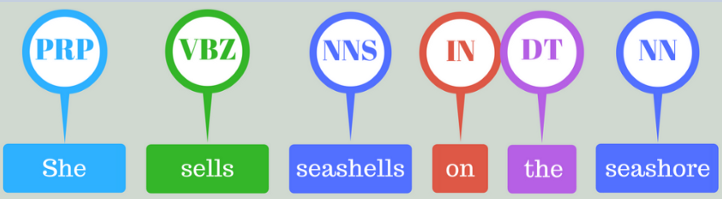

Algunos tipos de etiquetas para las palabras (tokens) se muestran en la siguiente imagen:

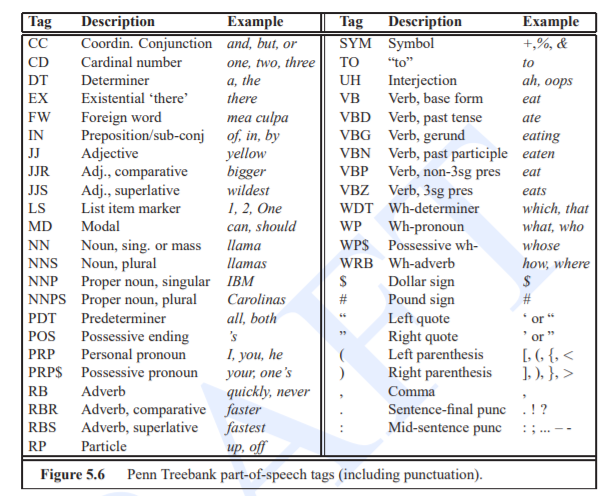

In [21]:
text = "vote to choose a particular man or a group (party) to represent them in parliament"

#Tokenizamos el texto
tex = word_tokenize(text)

#Por cada palabra en el texto mostramos la etiqueta que la identifica
for token in tex:
  print(nltk.pos_tag([token]))

[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


### 6. Name Entity Recognition (NER) - Reconocimiento de entidad nombrada | Parsing

Es el proceso de detección de las entidades nombradas como el nombre de la persona, el nombre de la ubicación, el nombre de la empresa, las cantidades, fechas y el valor monetario.

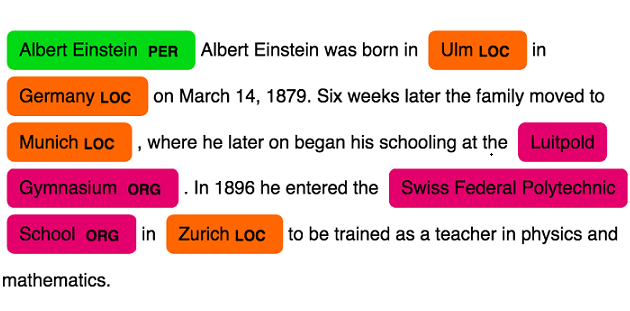

No sólo se identifican las entidades nombradas, sino que se realiza tambien el análisis de dependencias (PARSING), es decir, descubrir las relaciones entre todas las palabras de un texto.  

Los **algoritmos NLP construyen un árbol de análisis** que define la palabra raíz en la oración y cierra la brecha entre otros tokens.

También pueden definir una palabra madre para cada token para obtener más información y, posteriormente, comprender el concepto central.

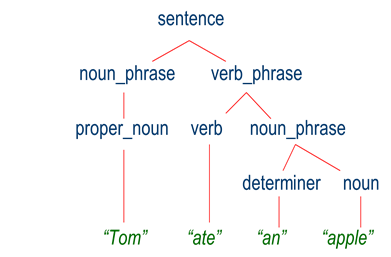

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.7 MB/s eta 0:00:00


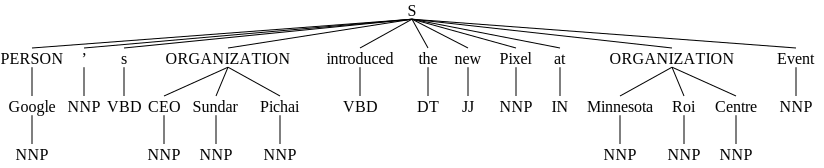

In [28]:
# Para visualizar el arbol de dependencias se debera instalar la libreria ghostscript
# conda install -c conda-forge ghostscript
!pip install ghostscript
!pip install svgling

text = "Google’s CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event"

#importar la libreria ne_chunk nltk
from nltk import ne_chunk

# tokenizamos y POS Tagging antes de realizar el NER
token = word_tokenize(text)
tags = nltk.pos_tag(token)
chunk = ne_chunk(tags)
chunk

**Parsing**

In [29]:
text = "We saw the yellow dog"
token = word_tokenize(text)
tags = nltk.pos_tag(token)
reg = "NP: {<DT>?<JJ>*<NN>}"
a = nltk.RegexpParser(reg)
result = a.parse(tags)
print(result)

(S We/PRP saw/VBD (NP the/DT yellow/JJ dog/NN))


### 7. Coreference resolution (Resolución de correferencia)

La resolución de correferencia se realiza para agrupar todas las menciones en el texto que se refieren a un concepto o entidad de la vida real. Por lo tanto, un modelo de NLP comprenderá a qué se refieren palabras como **"él"**, **"su"** o **"así"**.


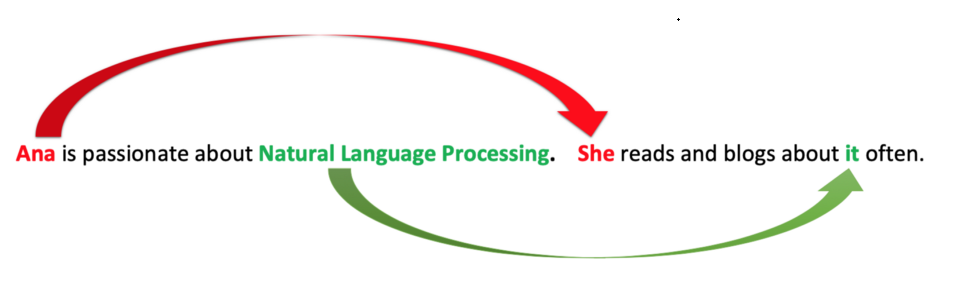

Se pueden usar varias librerías de código abierto para resolver la resolución de correferencia.

Este ejemplo se realiza utilizando los módulos **spaCy** y **NeuralCoref**:

* **spaCy** es una biblioteca de software de código abierto para el procesamiento avanzado del lenguaje natural.
* **NeuralCoref** es una extensión de canalización para spaCy que fue introducida por **Huggingface** (https://huggingface.co/coref/).

Instalación de librerías:

**EN ANACONDA**

* pip install -U spacy==2.3.0
* python -m spacy download en
* pip uninstall -y neuralcoref
* pip install neuralcoref --no-binary neuralcoref

**EN COLAB**

* !pip install -U spacy==2.1.0
* !python -m spacy download en
* !pip uninstall -y neuralcoref
* !pip install neuralcoref --no-binary neuralcoref

In [ ]:
import spacy
import neuralcoref

In [ ]:
#Cargamos el modelo en ingles
nlp = spacy.load('en_core_web_sm')
neuralcoref.add_to_pipe(nlp)

In [ ]:
# Texto de muestra para resolver la correferencia
text = "Mario said that he wants to go his home. Then Pedro gave the key of his car to Mario saying that he needs \
it back on Monday."

In [ ]:
# Recupera el Doc SpaCy Doc (compuesto por Tokens) - puede demorar algunos minutos
doc = nlp(text)

In [ ]:
# Recupera una lista de todos los grupos de menciones de correferencia usando el atributo doc ._. Coref_clusters
print(doc._.coref_clusters)

In [ ]:
# Reemplaza las menciones de correferencia con las menciones principales en cada clúster utilizando el
# atributo doc ._. Coref_resolved.
print(doc._.coref_resolved)